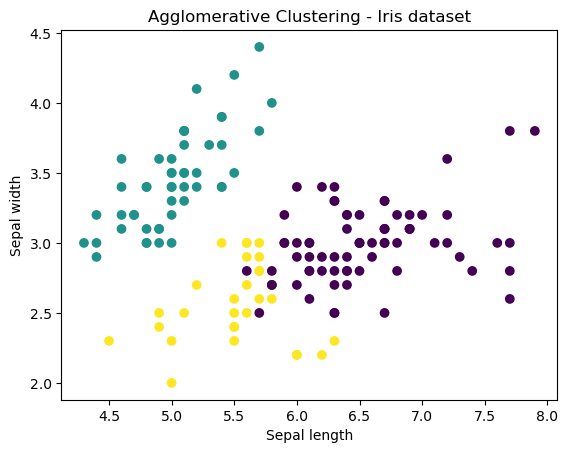

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
y_agg = agg_cluster.fit_predict(X_std)

# Visualize the clustering
plt.scatter(X[:, 0], X[:, 1], c=y_agg)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Agglomerative Clustering - Iris dataset')
plt.show()

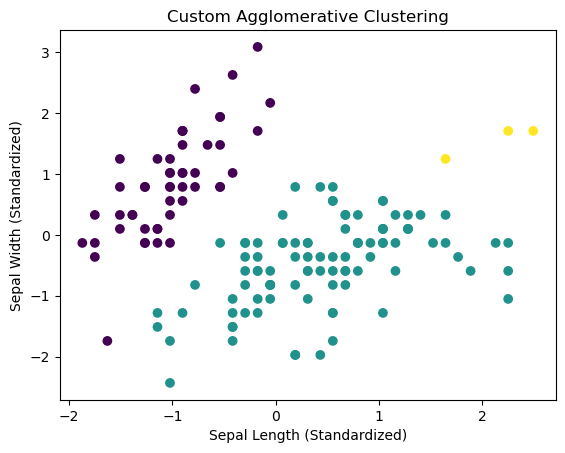

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Function to compute Euclidean Distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist, idx1, idx2 = dist_matrix[i, j], i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform custom agglomerative clustering
y_agg = agglomerative_clustering(X_std, n_clusters=3)

# Visualize the clustering result of custom function
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg, cmap='viridis')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()

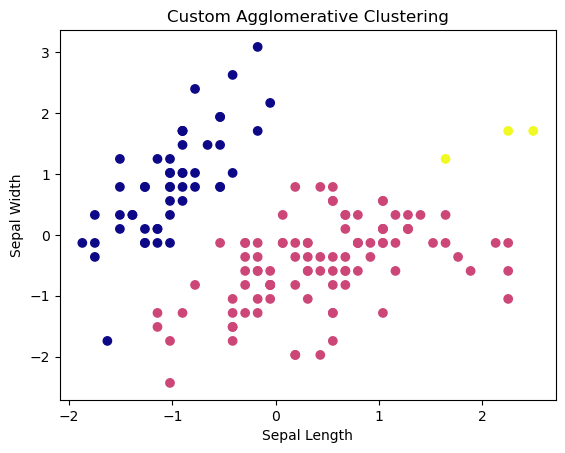

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data

# Function to compute Euclidean distance
def euc_dist(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dists = [euc_dist(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Agglomerative Clustering function
def agglomerative_clustering(X, n_clusters):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform agglomerative clustering with custom implementation
y_agg_custom = agglomerative_clustering(X_std, n_clusters=3)

# Plotting the results with custom implementation
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_agg_custom, cmap='plasma')
plt.title('Custom Agglomerative Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()